In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("ADVANCED_FEATURES.csv")

In [3]:
df.head()

,Placental Abruption,Neurological Disease,Endocrinal Issues,High BP,Congential Rebulla,Cord Prolapse,"Infection(Syphilis, Malaria, Hepatitis)",Blood Clotting Disorder,Oligohydramnios,Umbilical cord infection,Group -B infection,Multiple gestations,Fetal Movement,Fetal Heartbeat,Gestation Age,Placental Weight,Fetus Weight,STILLBIRTH PREDICTION
0,1,1,0,0,1,0,1,0,1,1,0,3,14,100,39,695,2.7,1
1,0,1,1,0,0,1,0,1,1,0,0,2,15,130,31,671,3.4,0
2,0,0,0,0,0,0,0,0,0,1,1,3,13,100,38,510,2.5,0
3,0,1,0,0,0,0,1,1,1,1,0,2,11,126,35,518,3.6,0
4,1,1,1,0,1,0,0,1,0,1,1,2,9,159,35,600,4.4,1


In [4]:
df.dtypes

Placental Abruption                          int64
Neurological Disease                         int64
Endocrinal Issues                            int64
High BP                                      int64
Congential Rebulla                           int64
Cord Prolapse                                int64
Infection(Syphilis, Malaria, Hepatitis)      int64
Blood Clotting Disorder                      int64
Oligohydramnios                              int64
Umbilical cord infection                     int64
Group -B infection                           int64
Multiple gestations                          int64
Fetal Movement                               int64
Fetal Heartbeat                              int64
Gestation Age                                int64
Placental Weight                             int64
Fetus Weight                               float64
STILLBIRTH PREDICTION                        int64
dtype: object

In [5]:
y=df['STILLBIRTH PREDICTION']
x=df.drop(['STILLBIRTH PREDICTION'],axis=1)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

svc=SVC(C= .1, kernel='linear', gamma= 1)
svc.fit(X_train,y_train)

xbg_model = XGBClassifier()
xbg_model.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

model=LogisticRegression()
model.fit(X_train,y_train)

print('KNN:{:.2f}'.format(knn.score(X_test,y_test)*100))
print('RANDOM_FOREST:{:.2f}'.format(rf.score(X_test,y_test)*100))
print('LOG_REG:{:.2f}'.format(model.score(X_test,y_test)*100))
print('XGB:{:.2f}'.format(xbg_model.score(X_test,y_test)*100))
print('SVM:{:.2f}'.format(svc.score(X_test,y_test)*100))

from sklearn.ensemble import VotingClassifier
estimators=[('knn', knn), ('rf', rf), ('log_reg', model),('XGB',xbg_model),('SVM',svc)]
ensemble = VotingClassifier(estimators,voting='hard')


ensemble.fit(X_train, y_train)
final_score=ensemble.score(X_test,y_test)

print(final_score*100, '%')

KNN:45.00
RANDOM_FOREST:70.00
LOG_REG:90.00
XGB:90.00
SVM:65.00
80.0 %


In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
accuracy=[]
precision=[]
recall=[]
score=[]

In [9]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier()  
classifier.fit(X_train, y_train)
print(classifier.score(X_test,y_test))
classi_pred=classifier.predict(X_test)

classi_accu=accuracy_score(y_test,classi_pred)
classi_recall=recall_score(y_test,classi_pred)
classi_pre=precision_score(y_test,classi_pred)
classi_f1=f1_score(y_test,classi_pred, average='weighted')

accuracy.append(classi_accu*100)
precision.append(classi_pre)
recall.append(classi_recall)
score.append(classi_f1)

print(classi_accu)

0.45
0.45


In [10]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
print(rnd_clf.score(X_test,y_test))
rnd_pred=rnd_clf.predict(X_test)

rnd_accu=accuracy_score(y_test,rnd_pred)
rnd_recall=recall_score(y_test,rnd_pred)
rnd_pre=precision_score(y_test,rnd_pred)
rnd_f1=f1_score(y_test,rnd_pred,average='weighted')

accuracy.append(rnd_accu*100)
precision.append(rnd_pre)
recall.append(rnd_recall)
score.append(rnd_f1)

print(rnd_accu)



0.85
0.85


In [11]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
model_pred=model.predict(X_test)

model_accu=accuracy_score(y_test,model_pred)
model_recall=recall_score(y_test,model_pred)
model_pre=precision_score(y_test,model_pred)
model_f1=f1_score(y_test,model_pred, average='weighted')

accuracy.append(model_accu*100)
precision.append(model_pre)
recall.append(model_recall)
score.append(model_f1)
pickle.dump(model,open('lr_model.pkl', 'wb'))
m = pickle.load(open('lr_model.pkl', 'rb')) 
print(model_accu)


0.9
0.9


In [12]:
from xgboost import XGBClassifier
xbg_model = XGBClassifier()
xbg_model.fit(X_train, y_train)
print(xbg_model.score(X_test,y_test))
xbg_pred=xbg_model.predict(X_test)

xbg_accu=accuracy_score(y_test,xbg_pred)
xbg_recall=recall_score(y_test,xbg_pred)
xbg_pre=precision_score(y_test,xbg_pred)
xbg_f1=f1_score(y_test,xbg_pred, average='weighted')

accuracy.append(xbg_accu*100)
precision.append(xbg_pre)
recall.append(xbg_recall)
score.append(xbg_f1)

print(xbg_accu)


0.9
0.9


In [13]:
from sklearn.svm import SVC
svc=SVC(C= .1, kernel='linear', gamma= 1)
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)

svc_accu=accuracy_score(y_test,svc_pred)
svc_recall=recall_score(y_test,svc_pred)
svc_pre=precision_score(y_test,svc_pred)
svc_f1=f1_score(y_test,svc_pred, average='weighted')

accuracy.append(svc_accu*100)
precision.append(svc_pre)
recall.append(svc_recall)
score.append(svc_f1)

print(svc_accu)

0.65


In [14]:
models = ['KNN', 'Random Forest', 'Logistic Regression', 'XGBoost', 'SVM']
model_test_scores = pd.DataFrame(list(zip(models,accuracy,precision,recall, score)), columns = ['Model', \
                                'Accuracy', 'Precision','Recall', 'F1-score'])
display(model_test_scores.head())

,Model,Accuracy,Precision,Recall,F1-score
0,KNN,45.0,0.545455,0.500000,0.454220
1,Random Forest,85.0,0.909091,0.833333,0.851151
2,Logistic Regression,90.0,0.916667,0.916667,0.900000
3,XGBoost,90.0,0.916667,0.916667,0.900000
4,SVM,65.0,0.777778,0.583333,0.652632


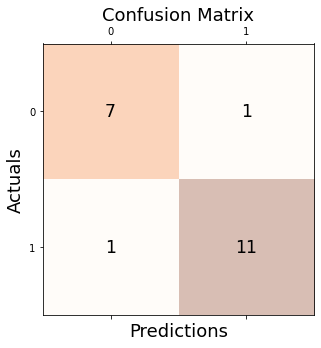

In [15]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=model_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [16]:
import shap
shap.initjs()

In [17]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

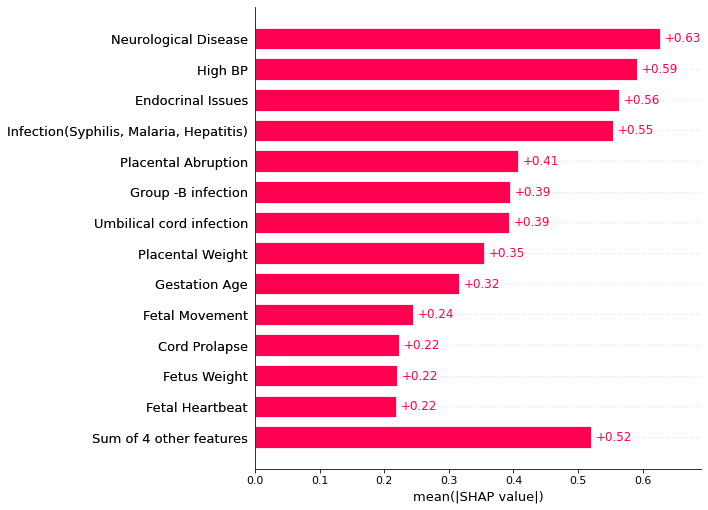

In [18]:
shap.plots.bar(shap_values, max_display=14)

In [19]:
df.columns

Index(['Placental Abruption', 'Neurological Disease', 'Endocrinal Issues',
       'High BP', 'Congential Rebulla', 'Cord Prolapse',
       'Infection(Syphilis, Malaria, Hepatitis)', 'Blood Clotting Disorder',
       'Oligohydramnios', 'Umbilical cord infection', 'Group -B infection',
       'Multiple gestations', 'Fetal Movement', 'Fetal Heartbeat',
       'Gestation Age', 'Placental Weight', 'Fetus Weight',
       'STILLBIRTH PREDICTION'],
      dtype='object')

In [20]:
print("Enter values for the following data: ")
plac=int(input("Placental Abruption"))
neu=int(input("Neurological Disease"))
endo=int(input("Endocrinal Issues"))
bp=int(input("High BP"))
con=int(input("Congential Rebulla"))
cord=int(input("Cord Prolapse"))
inf=int(input("Infection(Syphilis, Malaria, Hepatitis)"))
bcd=int(input("Blood Clotting Disorder"))
oli=int(input("Oligohydramnios"))
uci=int(input("Umbilical cord infection"))
grpb=int(input("Group -B infection"))
mulges=int(input("Multiple gestations"))
fetmov=int(input("Fetal Movement"))
fetheart=int(input("Fetal Heartbeat"))
gesage=int(input("Gestation Age"))
plawe=int(input("Placental Weight"))
fetwei=float(input("Fetus Weight"))




Enter values for the following data: 


ValueError: invalid literal for int() with base 10: ''

In [ ]:
dict = {'Placental Abruption':[plac],
        'Neurological Disease':[neu],
        'Endocrinal Issues':[endo],
        'High BP':[bp],
        'Congential Rebulla':[con],
        'Cord Prolapse':[cord],
        'Infection(Syphilis, Malaria, Hepatitis)':[inf],
        'Blood Clotting Disorder':[bcd],
        'Oligohydramnios':[oli],
        'Umbilical cord infection':[uci],
        'Group -B infection':[grpb],
        'Multiple gestations':[mulges],
        'Fetal Movement':[fetmov],
        'Fetal Heartbeat':[fetheart],
        'Gestation Age':[gesage],
        'Placental Weight':[plawe],
        'Fetus Weight':[fetwei]
       }

df1=pd.DataFrame(dict)
display(df1)

X_test = pd.concat([X_test, df1], ignore_index = True)
X_test.reset_index()

,Placental Abruption,Neurological Disease,Endocrinal Issues,High BP,Congential Rebulla,Cord Prolapse,"Infection(Syphilis, Malaria, Hepatitis)",Blood Clotting Disorder,Oligohydramnios,Umbilical cord infection,Group -B infection,Multiple gestations,Fetal Movement,Fetal Heartbeat,Gestation Age,Placental Weight,Fetus Weight
0,1,1,0,1,0,0,1,1,0,0,0,3,14,130,38,691,2


,index,Placental Abruption,Neurological Disease,Endocrinal Issues,High BP,Congential Rebulla,Cord Prolapse,"Infection(Syphilis, Malaria, Hepatitis)",Blood Clotting Disorder,Oligohydramnios,Umbilical cord infection,Group -B infection,Multiple gestations,Fetal Movement,Fetal Heartbeat,Gestation Age,Placental Weight,Fetus Weight
0,0,1,1,0,1,1,1,1,1,1,1,0,3,11,151,34,589,3.2
1,1,0,1,1,0,1,1,1,0,1,0,1,2,15,104,29,546,4.2
2,2,0,0,0,0,0,0,0,0,0,1,1,3,13,100,38,510,2.5
3,3,1,1,0,1,1,1,1,1,0,1,0,2,12,137,33,575,2.0
4,4,1,0,1,0,0,1,1,1,0,0,1,2,12,149,41,638,2.7
5,5,0,0,1,0,1,1,0,0,0,1,1,3,10,116,35,599,3.9
6,6,0,1,0,1,1,1,0,0,0,0,0,3,11,145,26,690,3.3
7,7,0,0,0,1,0,0,1,1,0,0,1,2,15,128,37,540,3.4
8,8,1,0,1,0,1,1,1,0,1,0,1,3,15,109,28,528,4.5
9,9,1,0,0,1,1,1,1,0,1,0,0,3,10,157,33,533,2.9


19
Model Prediction is:  1


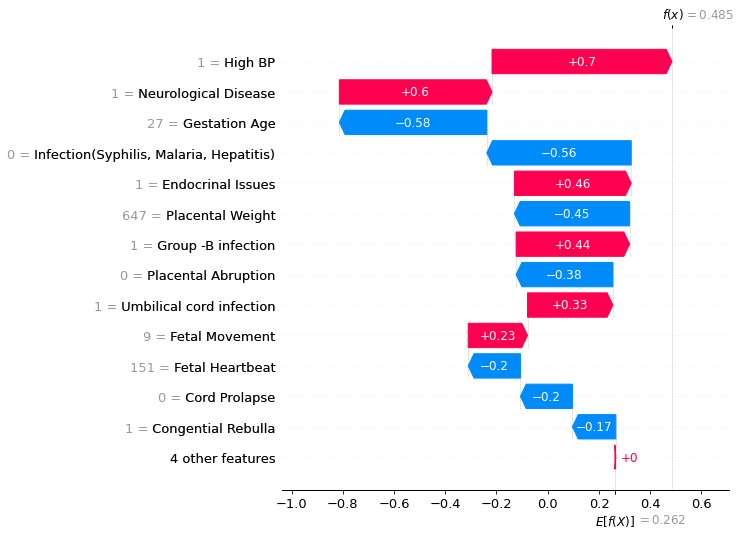

In [ ]:
p=X_test.tail(1).index.item() - 1
# q=p-1
print(p)
prediction = model.predict(X_test[p:p+1])[0]
print("Model Prediction is: ",prediction)
shap.plots.waterfall(shap_values[p], max_display=14)
# shap.plots.bar(shap_values[p], max_display=14)

In [ ]:
dict = {'Placental Abruption':[plac],
        'Neurological Disease':[neu],
        'Endocrinal Issues':[endo],
        'High BP':[bp],
        'Congential Rebulla':[con],
        'Cord Prolapse':[cord],
        'Infection(Syphilis, Malaria, Hepatitis)':[inf],
        'Blood Clotting Disorder':[bcd],
        'Oligohydramnios':[oli],
        'Umbilical cord infection':[uci],
        'Group -B infection':[grpb],
        'Multiple gestations':[mulges],
        'Fetal Movement':[fetmov],
        'Fetal Heartbeat':[fetheart],
        'Gestation Age':[gesage],
        'Placental Weight':[plawe],
        'Fetus Weight':[fetwei],
        'STILLBIRTH PREDICTION':[prediction]
       }
df1=pd.DataFrame(dict)
display(df1)

df = pd.concat([df, df1], ignore_index = True)
df.reset_index()

,Placental Abruption,Neurological Disease,Endocrinal Issues,High BP,Congential Rebulla,Cord Prolapse,"Infection(Syphilis, Malaria, Hepatitis)",Blood Clotting Disorder,Oligohydramnios,Umbilical cord infection,Group -B infection,Multiple gestations,Fetal Movement,Fetal Heartbeat,Gestation Age,Placental Weight,Fetus Weight,STILLBIRTH PREDICTION
0,1,1,0,1,0,0,1,1,0,0,0,3,14,130,38,691,2,1


,index,Placental Abruption,Neurological Disease,Endocrinal Issues,High BP,Congential Rebulla,Cord Prolapse,"Infection(Syphilis, Malaria, Hepatitis)",Blood Clotting Disorder,Oligohydramnios,Umbilical cord infection,Group -B infection,Multiple gestations,Fetal Movement,Fetal Heartbeat,Gestation Age,Placental Weight,Fetus Weight,STILLBIRTH PREDICTION
0,0,1,1,0,0,1,0,1,0,1,1,0,3,14,100,39,695,2.7,1
1,1,0,1,1,0,0,1,0,1,1,0,0,2,15,130,31,671,3.4,0
2,2,0,0,0,0,0,0,0,0,0,1,1,3,13,100,38,510,2.5,0
3,3,0,1,0,0,0,0,1,1,1,1,0,2,11,126,35,518,3.6,0
4,4,1,1,1,0,1,0,0,1,0,1,1,2,9,159,35,600,4.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0,0,1,0,1,0,0,1,1,1,1,3,10,173,28,540,2.2,0
96,96,1,1,1,0,0,1,0,1,1,0,0,3,14,141,28,634,4.7,1
97,97,0,0,1,0,0,0,0,1,1,0,1,3,7,101,42,678,4.2,1
98,98,1,1,0,1,0,1,1,0,0,0,1,2,15,105,44,498,3.5,1


In [ ]:
q=X_test.tail(1).index.item()
risk_pred = xbg_model.predict_proba(X_test[q:q+1])[0]
risk=risk_pred[1]*100
print(risk)
print("Risk of Stillbirth: ","{:.2f}".format(risk_pred[1]*100),"%")

96.86721563339233
Risk of Stillbirth:  96.87 %


In [ ]:
 if risk>=0 and risk<=40:
    print("StillBirth risk is LOW")
elif risk>40 and risk<=70:
    print("StillBirth can occur")
else:
    print("StillBirth risk is HIGH, Please consult nearby Hospitals")    

StillBirth risk is HIGH, Please consult nearby Hospitals
